# Pymaceuticals Inc.
---

### Analysis
Background: For this study, 249 mice who were identified with SCC tumors received treatment with a range of drug regimens. Over the course of 45 days, tumor development was observed and measured. The purpose of this study was to compare the performance of Pymaceuticals’ drug of interest, Capomulin, against the other treatment regimens.

Observations/Comparisions: 
 - The correlation coefficient of 0.84 shows a positive correlation of mouse weight to tumor size. The heaver the mouse, the larger the tumor. 
 - The 'Tumor Volume for Each Treatment Group' chart illustrates that Capomulin and Ramicane are the most effective treatments in decreasing the size of tumors 
 -  The Tumor Volume vs. Time Point for Mouse u364 chart shows how Capomulin had a dramatic effect in decreasing the size of Mouse u364's tumor by 16 mm3 over 45 days. 


In [122]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(mouse_metadata, study_results, on='Mouse ID')

# Select and reorder the columns
desired_columns = ['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)']
combined_data = combined_data[desired_columns]

# Display the data table for preview
combined_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,0,45.000000,0,Ramicane,Male,21,16
1,k403,5,38.825898,0,Ramicane,Male,21,16
2,k403,10,35.014271,1,Ramicane,Male,21,16
3,k403,15,34.223992,1,Ramicane,Male,21,16
4,k403,20,32.997729,1,Ramicane,Male,21,16


In [2]:
# Checking the number of mice.
num_mice = combined_data['Mouse ID'].nunique()
num_mice

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse_ids = combined_data[combined_data.duplicated(['Mouse ID', 'Timepoint'])]['Mouse ID'].unique()

duplicate_mouse_ids

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_id = 'g989'
duplicate_mouse_data = combined_data[combined_data['Mouse ID'] == duplicate_mouse_id]

duplicate_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
908,g989,0,45.000000,0,Propriva,Female,21,26
909,g989,0,45.000000,0,Propriva,Female,21,26
910,g989,5,48.786801,0,Propriva,Female,21,26
911,g989,5,47.570392,0,Propriva,Female,21,26
912,g989,10,51.745156,0,Propriva,Female,21,26
913,g989,10,49.880528,0,Propriva,Female,21,26
914,g989,15,51.325852,1,Propriva,Female,21,26
915,g989,15,53.442020,0,Propriva,Female,21,26
916,g989,20,55.326122,1,Propriva,Female,21,26
917,g989,20,54.657650,1,Propriva,Female,21,26


In [148]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data = cleaned_data = combined_data[combined_data['Mouse ID'] != duplicate_mouse_id]
cleaned_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,0,45.000000,0,Ramicane,Male,21,16
1,k403,5,38.825898,0,Ramicane,Male,21,16
2,k403,10,35.014271,1,Ramicane,Male,21,16
3,k403,15,34.223992,1,Ramicane,Male,21,16
4,k403,20,32.997729,1,Ramicane,Male,21,16


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_mice = cleaned_data['Mouse ID'].nunique()
clean_mice

248

## Summary Statistics

In [38]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
summary_statistics = combined_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean().rename('Mean Tumor Volume').to_frame() 
summary_statistics['Mean Tumor Volume'] = combined_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean() 
summary_statistics['Median Tumor Volume'] = combined_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()  
summary_statistics['Tumor Volume Variance'] = combined_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()  
summary_statistics['Tumor Volume Std. Dev.'] = combined_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()  
summary_statistics['Tumor Volume Std. Err.'] = combined_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary DataFrame.
summary_statistics


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [39]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_statistics = combined_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

summary_statistics

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

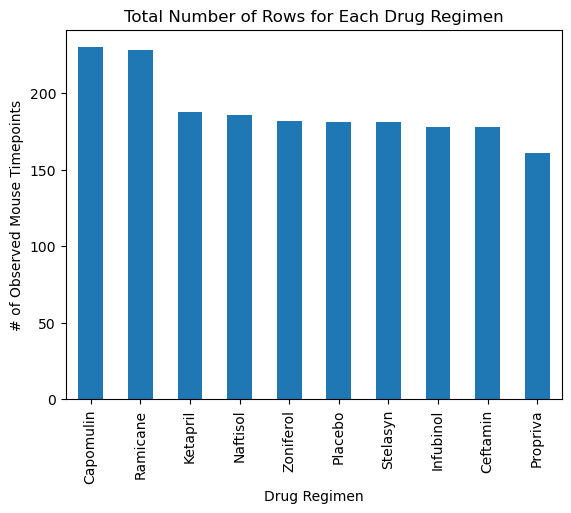

In [45]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# Count the number of rows for each drug regimen
count_per_regimen = combined_data['Drug Regimen'].value_counts()

# Plot the bar chart
count_per_regimen.plot(kind='bar')

# Add labels and title
plt.title('Total Number of Rows for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')

# Show the plot
plt.show()

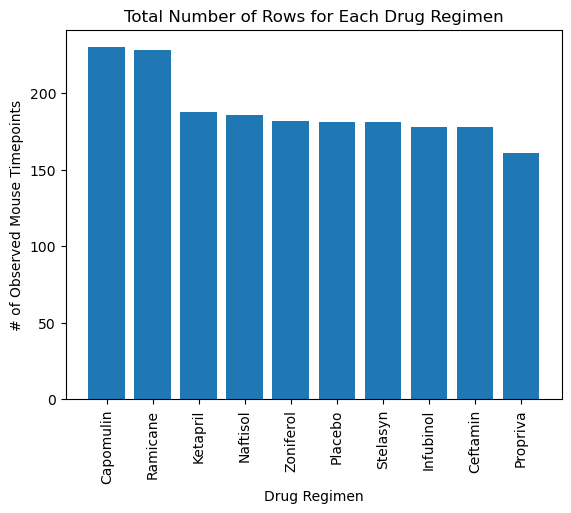

In [146]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
# Count the number of rows for each drug regimen
count_per_regimen = combined_data['Drug Regimen'].value_counts()

# Create a bar plot using pyplot
plt.figure()
plt.bar(count_per_regimen.index, count_per_regimen)
plt.xticks(rotation=90)

# Add labels and title
plt.title('Total Number of Rows for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')


# Show the plot
plt.show()

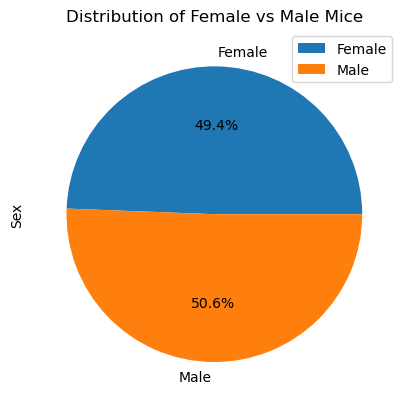

In [91]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# Count the number of male and female mice
gender_distribution = combined_data.groupby(['Sex']).count()


# Plot the pie chart
gender_plot = gender_distribution.plot.pie(y = "Mouse ID", autopct='%1.1f%%')

# Add title
plt.title('Distribution of Female vs Male Mice')
plt.ylabel('Sex')

# Show the plot
plt.show()

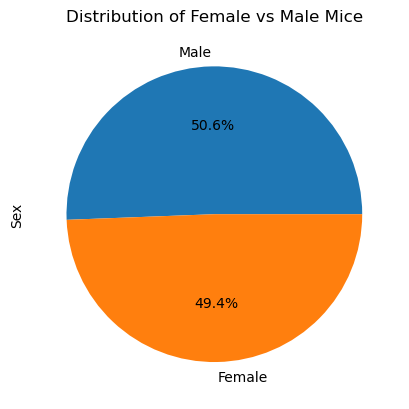

In [67]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_distribution = combined_data['Sex'].value_counts()

# Create a pie plot using pyplot
plt.pie(gender_distribution, labels=gender_distribution.index, autopct='%1.1f%%')

# Add title
plt.title('Distribution of Female vs Male Mice')
plt.ylabel('Sex')

# Show the plot
plt.show()

## Quartiles, Outliers and Boxplots

In [93]:
# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = filtered_data.groupby('Mouse ID')['Timepoint'].max()

# Merge this group df with the original dataframe to get the tumour volume at the last timepoint
final_tumor_volume = pd.merge(last_timepoint, combined_data, on=['Mouse ID', 'Timepoint'])
final_tumor_volume.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a275,45,62.999356,3,Ceftamin,Female,20,28
3,a411,45,38.407618,1,Ramicane,Male,3,22
4,a444,45,43.047543,0,Ramicane,Female,10,25


In [98]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumour vol data for plotting
capomulin_data = []
ramicane_data = []
infubinol_data = []
ceftamin_data = []
    
# Locate the rows which contain mice on each drug and get the tumour volumes
for index, row in final_tumor_volume.iterrows():
    if row["Drug Regimen"] == treatments[0]:
        capomulin_data.append(row['Tumor Volume (mm3)'])
    if row["Drug Regimen"] == treatments[1]:
        ramicane_data.append(row['Tumor Volume (mm3)'])
    if row["Drug Regimen"] == treatments[2]:
        infubinol_data.append(row['Tumor Volume (mm3)'])
    if row["Drug Regimen"] == treatments[3]:
        ceftamin_data.append(row['Tumor Volume (mm3)'])      

# Add to new DF
treatments_df = pd.DataFrame({treatments[0]: capomulin_data,
                       treatments[1]: ramicane_data,
                       treatments[2]: infubinol_data,
                       treatments[3]: ceftamin_data
                       })

treatments_df.head()

,Capomulin,Ramicane,Infubinol,Ceftamin
0,38.982878,38.407618,67.973419,62.999356
1,38.939633,43.047543,65.525743,45.000000
2,30.485985,38.810366,57.031862,56.057749
3,37.074024,32.978522,66.083066,55.742829
4,40.159220,38.342008,72.226731,48.722078


In [109]:

# Capomulin
cap_q1 = np.percentile(capomulin_data, 25, interpolation = 'midpoint')
cap_q2 = np.percentile(capomulin_data, 50, interpolation = 'midpoint') 
cap_q3 = np.percentile(capomulin_data, 75, interpolation = 'midpoint') 
cap_iqr = cap_q3 - cap_q1
cap_low = cap_q1 - (1.5 * cap_iqr)
cap_up = cap_q3 + (1.5 * cap_iqr)

# Ramicane
ram_q1 = np.percentile(ramicane_data, 25, interpolation = 'midpoint')
ram_q2 = np.percentile(ramicane_data, 50, interpolation = 'midpoint') 
ram_q3 = np.percentile(ramicane_data, 75, interpolation = 'midpoint') 
ram_iqr = ram_q3 - ram_q1
ram_iqr = ram_q3 - ram_q1
ram_low = ram_q1 - (1.5 * ram_iqr)
ram_up = ram_q3 + (1.5 * ram_iqr)

# Infubinol
inf_q1 = np.percentile(infubinol_data, 25, interpolation = 'midpoint')
inf_q2 = np.percentile(infubinol_data, 50, interpolation = 'midpoint') 
inf_q3 = np.percentile(infubinol_data, 75, interpolation = 'midpoint') 
inf_iqr = inf_q3 - inf_q1 
inf_iqr = inf_q3 - inf_q1
inf_low = inf_q1 - (1.5 * inf_iqr)
inf_up = inf_q3 + (1.5 * inf_iqr)

# Ceftamin
cef_q1 = np.percentile(ceftamin_data, 25, interpolation = 'midpoint') 
cef_q2 = np.percentile(ceftamin_data, 50, interpolation = 'midpoint')
cef_q3 = np.percentile(ceftamin_data, 75, interpolation = 'midpoint') 
cef_iqr = cef_q3 - cef_q1 
cef_iqr = cef_q3 - cef_q1
cef_low = cef_q1 - (1.5 * cef_iqr)
cef_up = cef_q3 + (1.5 * cef_iqr)
    
# Identify potential outliers
outlier_cap =[]
outlier_ram = []
outlier_inf = []
outlier_cef = []

for x in capomulin_data:
    if ((x> cap_up) or (x<cap_low)):
         outlier_cap.append(x)
            
for x in ramicane_data:
    if ((x > ram_up) or (x < ram_low)):
         outlier_ram.append(x)
            
for x in infubinol_data:
    if ((x > inf_up) or (x < inf_low)):
         outlier_inf.append(x)
            
for x in ceftamin_data:
    if ((x > cef_up) or (x < cef_low)):
         outlier_cef.append(x)

 # Print information for the current treatment
print('Outliers in the Capomulin dataset are', outlier_cap)
print('Outliers in the Ramicane dataset are', outlier_ram)
print('Outliers in the Infubinol dataset are', outlier_inf)
print('Outliers in the Ceftamin dataset are', outlier_cef)

Outliers in the Capomulin dataset are []
Outliers in the Ramicane dataset are []
Outliers in the Infubinol dataset are [36.3213458]
Outliers in the Ceftamin dataset are []


/var/folders/gh/kkznygbs6_51nrcgm1x8cfx80000gn/T/ipykernel_7814/1703838375.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  cap_q1 = np.percentile(capomulin_data, 25, interpolation = 'midpoint')
/var/folders/gh/kkznygbs6_51nrcgm1x8cfx80000gn/T/ipykernel_7814/1703838375.py:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  cap_q2 = np.percentile(capomulin_data, 50, interpolation = 'midpoint')
/var/folders/gh/kkznygbs6_51nrcgm1x8cfx80000gn/T/ipykernel_7814/1703838375.py:4: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has add

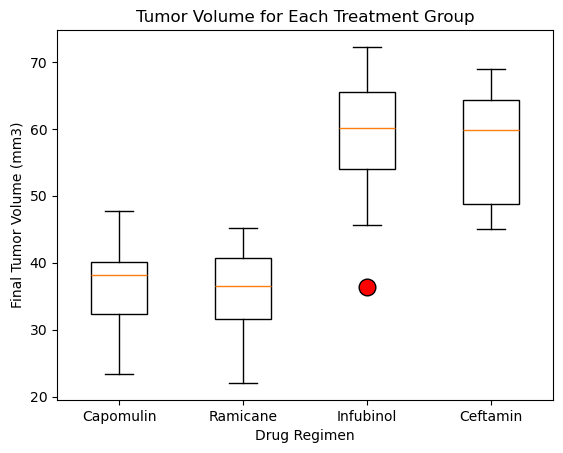

In [145]:
# Style outlier/flier to stand out
outliers = dict(marker='o', markerfacecolor='red', markersize=12)

# Lists to plot
plot_list = [treatments_df[treatments[0]],
                treatments_df[treatments[1]],
                treatments_df[treatments[2]],
                treatments_df[treatments[3]]]

# Plot output and styling
fig1, ax = plt.subplots()
# Add labels and title
plt.title('Tumor Volume for Each Treatment Group')
plt.xlabel('Drug Regimen')
plt.ylabel('Final Tumor Volume (mm3)')

ax.boxplot(plot_list, patch_artist=True, boxprops=dict(facecolor='white'), showmeans=False, flierprops=outliers)
plt.xticks([1,2,3,4], treatments)

# Show the plot
plt.show()

## Line and Scatter Plots

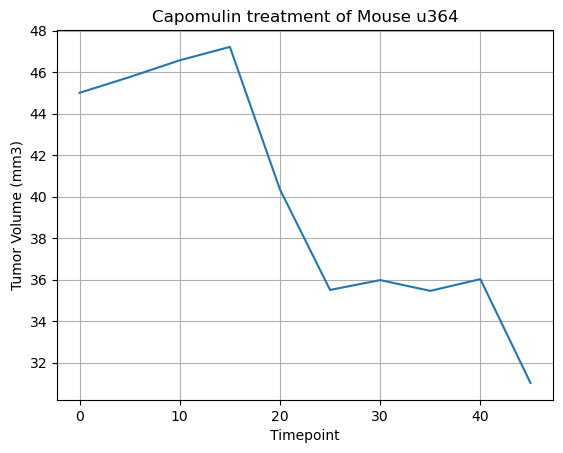

In [144]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# Choose a specific mouse treated with Capomulin
mouse_id_capomulin = 'u364'  # Replace with the Mouse ID you're interested in

# Select data for the chosen mouse
mouse_capomulin_data = combined_data.loc[
    (combined_data['Drug Regimen'] == 'Capomulin') & (combined_data['Mouse ID'] == mouse_id_capomulin)
]

# Create a line plot
plt.figure
plt.plot(mouse_capomulin_data['Timepoint'], mouse_capomulin_data['Tumor Volume (mm3)'])

# Add labels and title
plt.title(f'Capomulin treatment of Mouse {mouse_id_capomulin}')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')

# Show the plot
plt.grid(True)
plt.show()

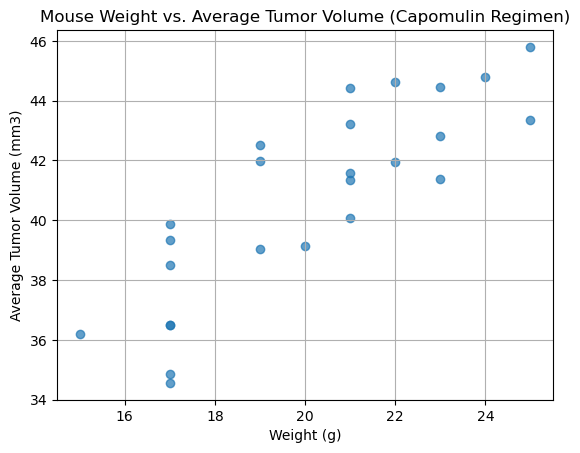

In [137]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# Select data for the Capomulin regimen
mouse_capomulin_data = combined_data[combined_data['Drug Regimen'] == 'Capomulin']

# Calculate the average tumor volume for each mouse
average_tumor_volume = mouse_capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Merge average tumor volume with mouse metadata to get weight information
capomulin_average_data = pd.merge(average_tumor_volume, mouse_metadata, on='Mouse ID')

# Create a scatter plot
plt.figure
plt.scatter(capomulin_average_data['Weight (g)'], capomulin_average_data['Tumor Volume (mm3)'], alpha=0.7)

# Add labels and title
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Show the plot
plt.grid(True)
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84
The linear regression is y = 0.95x + 21.55


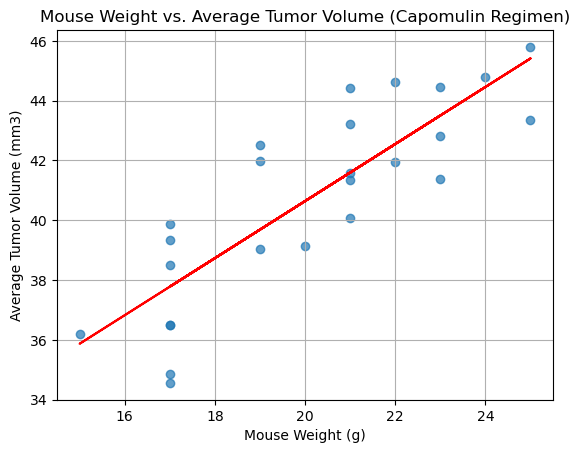

In [136]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# Calculate the correlation coefficient
correlation_coefficient = capomulin_average_data['Weight (g)'].corr(capomulin_average_data['Tumor Volume (mm3)'])

# Perform linear regression
slope, intercept, r_value, p_value, std_err = st.linregress(capomulin_average_data['Weight (g)'], capomulin_average_data['Tumor Volume (mm3)'])

#print correlation and linear regression
print(f"The correlation between mouse weight and the average tumor volume is {correlation_coefficient:.2f}")
print(f"The linear regression is y = {slope:.2f}x + {intercept:.2f}")

# Create a scatter plot
plt.figure
plt.scatter(capomulin_average_data['Weight (g)'], capomulin_average_data['Tumor Volume (mm3)'], alpha=0.7)

# Add the linear regression line to the plot
regress_values = slope * capomulin_average_data['Weight (g)'] + intercept
plt.plot(capomulin_average_data['Weight (g)'], regress_values, color='red')

# Add labels and title
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Show the plot
plt.grid(True)
plt.show()